In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob

Matplotlib is building the font cache; this may take a moment.


In [2]:
def plot_all_points(data, extent):
    fig = plt.figure()
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0:1, :], projection=ccrs.Robinson(central_longitude=0))
    # [-60, 0, 40, 90]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='auto', color='k')
    ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)

    ax.plot(data.LONGITUDE.values, data.LATITUDE.values, '.', markersize=1, transform=ccrs.PlateCarree())

    plt.show()
    
def plot_prof(data):
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

    sc1=ax[0].scatter(data.LONGITUDE, data.PRES, c=data.PSAL)
    sc2=ax[1].scatter(data.LONGITUDE, data.PRES, c=data.TEMP)

    ax[0].set_title(f"SALINITY of floats")
    ax[1].set_title(f"TEMP of floats")

    ax[0].set_xlabel(f"{data.LONGITUDE[0].long_name}")
    ax[0].set_ylabel(f"{data.PRES[0].long_name}")

    fig.colorbar(sc1);
    fig.colorbar(sc2);

    fig.tight_layout()

    plt.show()
    
def plot_traj(data, extent):
    fig = plt.figure()
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0:1, :], projection=ccrs.PlateCarree(central_longitude=0))
    # [-60, 0, 40, 90]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='auto', color='k')
    ax.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
    ax.coastlines()

    buoy_no = np.unique(data.data_vars['PLATFORM_NUMBER'].values)

    for b in buoy_no: 
        ind = np.where(data.data_vars['PLATFORM_NUMBER'].values == b)
        LAT = data.data_vars['PLATFORM_NUMBER'][ind].LATITUDE.values
        LON = data.data_vars['PLATFORM_NUMBER'][ind].LONGITUDE.values

        ax.plot(LON, LAT, '.-', markersize=1, c='r', transform=ccrs.PlateCarree())


    plt.show()

In [6]:
data = xr.open_dataset('../Data/data_2012.nc')

/accounts/campus/shahzar/.conda/envs/argos/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


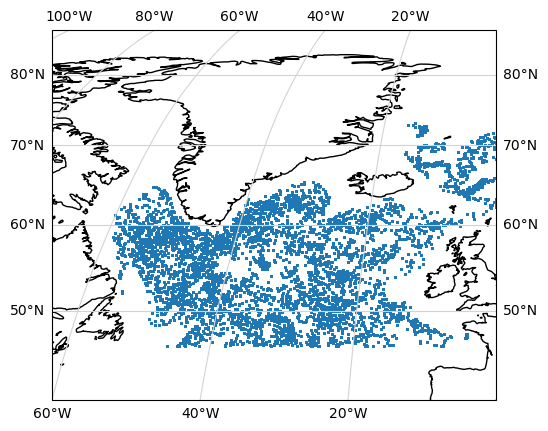

In [7]:
plot_all_points(data, [-60, 0, 40, 90])

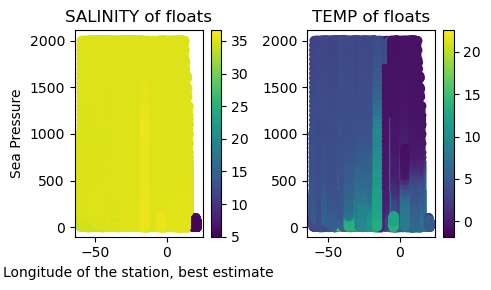

In [8]:
plot_prof(data)

/accounts/campus/shahzar/.conda/envs/argos/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


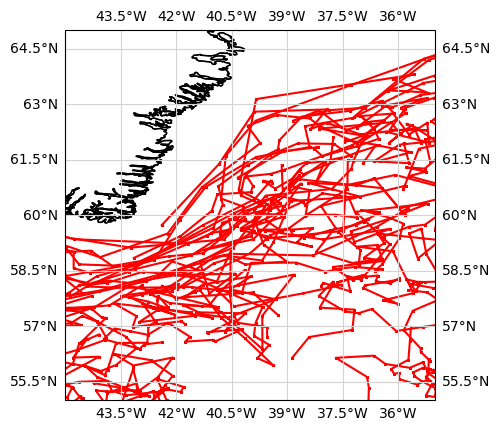

In [9]:
plot_traj(data, [-45, -35, 55, 65])